# Strutture dati ed algoritmi

## Alberi

La rappresentazione più comune che sarà adoperata per il corso per gli alberi $n$-ari sono le *lol* (liste di liste)

In [ ]:
# [radice] 
# [radice alberi…]

tree = [1, [11, [111]], [12, [121], [122]], [13]]

Accedere a radice e figli con l'[iterable unpacking](https://docs.python.org/3/reference/expressions.html?highlight=iterable+unpacking#expression-lists)…

In [ ]:
root, *children = tree

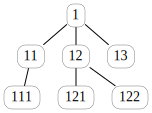

In [ ]:
# uso di liblet per ottenre una rappresentazione grafica 

from liblet import Tree

t = Tree.from_lol(tree)
t

In [ ]:
radice, *resto =t

### Visite

* preordine, 
* postordine, 
* per livello.

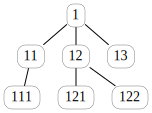

In [ ]:
def preorder(tree, visitor):
  root, *children = tree
  visitor(root)
  for child in children: preorder(child, visitor)

t

In [ ]:
preorder(tree, print)

1
11
111
12
121
122
13


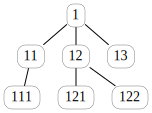

In [ ]:
def postorder(tree, visitor):
  root, *children = tree
  for child in children: postorder(child, visitor)
  visitor(root)

t

In [ ]:
postorder(tree, print)

111
11
121
122
12
13
1


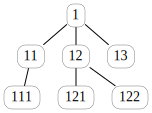

In [ ]:
from liblet import Queue

def levelorder(tree, visitor):

  Q = Queue()

  Q.enqueue(tree)
  while Q:
    tree = Q.dequeue()
    root, *children = tree
    visitor(root)
    for st in children: Q.enqueue(st)

t

In [ ]:
levelorder(tree, print)

1
11
12
13
111
121
122


### Alberi con attributi 

Per ora gli alberi avevano interi come velori dei nodi, costruiamo un albero che abbia `dict` come valori (e che conservi il valore numerico come valore della chiave `val`).

In [ ]:
def add_attr(tree):
  root, *children = tree
  return [{'val': root}] + [add_attr(child) for child in children]

In [ ]:
tree = [1, [11, [111]], [1200, [121], [122]], [13]]

add_attr(tree)

[{'val': 1},
 [{'val': 11}, [{'val': 111}]],
 [{'val': 1200}, [{'val': 121}], [{'val': 122}]],
 [{'val': 13}]]

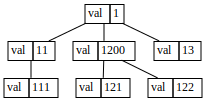

In [ ]:
Tree.from_lol(add_attr(tree))

#### Attributi ereditati e preorder

Come vedremo più avanti, gli attributi ereditati sono attributi che i nodi dei sottoalberi ereditano dal padre; ad esempio la *profondità*.

Per calcolarli si può usare una modifica della visita in preordine in cui al *visitor* venga passato non solo il nodo ma anche il valore dell'attributo ereditato.


In [ ]:
def preorder_with_value(tree, visitor, value = None):
  root, *children = tree
  visitor(root, value)
  for child in children: preorder_with_value(child, visitor, root['depth'])

In [ ]:
# visitor che aggiunge l'attributo depth (pari a 1 + il valore ereditato, il caso None riguarda la radice)

def add_depth(root, value):
  root['depth'] = value + 1 if value is not None else 0

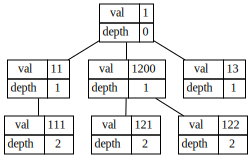

In [ ]:
attr_tree = add_attr(tree)

# uso il nodo fittizio {'depth': 0} come "primo" parent dell'albero

preorder_with_value(attr_tree, add_depth) 

Tree.from_lol(attr_tree)

#### Attributi sintetizzati e postorder

Gli attributi sintetizzati sono attributi che il nodo radice di un albero ricava dal valore degli attributi nei sottoalberi; ad esempio, il *massimo* valore.

Per calcolarli si può usare una modifica della visita in postordine in cui al *visitor* venga passato non solo il nodo ma anche i valori restituiti dalle visite dei sottoalberi.


In [ ]:
def postorder_with_return(tree, visitor):
  root, *children = tree
  values = [postorder_with_return(child, visitor) for child in children] # sarà la lista vuota se non ci sono figli
  return visitor(root, values)

In [ ]:
# visitor che aggiunge l'attributo max (pari al massimo tra il valore del nodo e quelli sintetizzati dai figli)

def add_max(root, values):
  root['max'] = max([root['val']] + values)
  return root['max']

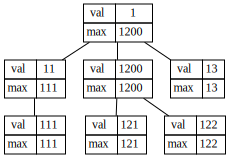

In [ ]:
attr_tree = add_attr(tree)

postorder_with_return(attr_tree, add_max)

Tree.from_lol(attr_tree)